## Initialization

In [1]:
# %%import 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, windows

# %% initialize parameters
samplerate=500 # in Hz

segmentNo=20 # for Welch method

## Load Data

(0.0, 10.0)

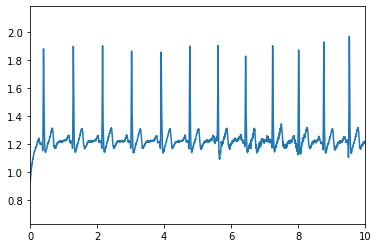

In [2]:
# %% load ECG data 
data = np.loadtxt('ECG_500SampleRate.txt')


N=len(data)
plt.figure()
plt.plot(np.arange(N)/samplerate,data)
plt.xlim(0, 10)

## 3 Detect R peak

* Get R peak using the event detection method
* Get HRV from R-R interval 

In [3]:
# %% detect R peak and store R-R interval
# perform double-threshold method to detect R peak
# threshold 1: magnitude
(indmag,)=np.nonzero(data>1.5)   # find the index with value larger than 1.5

# threshold 2: define window
diffind=indmag[1:]-indmag[:-1]
(indgap,)=np.nonzero(diffind>1)

indmax=[]   # the location of index with maximal value in each cycle

for i in range(len(indgap)+1):
    if i==0:
        local_index = np.argmax(data[indmag[:indgap[i]]])  #be careful with the index!!!!!
        indmax.append(local_index+indmag[0])
    elif i == len(indgap):
        local_index = np.argmax(data[indmag[indgap[i-1]+1:]])
        indmax.append(local_index + indmag[indgap[i-1]+1])
    else:
        local_index = np.argmax(data[indmag[indgap[i-1]+1:indgap[i]]])
        indmax.append(local_index + indmag[indgap[i-1]+1])


RRinterval=[]  # heart rate variability (HRV)
RRinterval=np.diff(indmax)/samplerate
HRV=60/RRinterval

(Text(0.5, 0, 'R-R interval (s)'), Text(0, 0.5, 'count beats'))

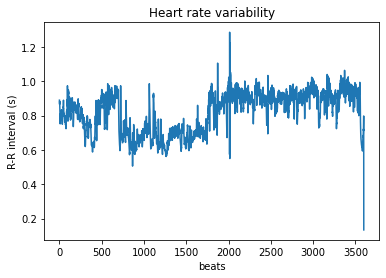

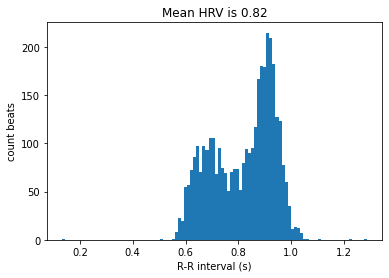

In [4]:
# %% rewrite data set by HRV
data=RRinterval 
# data=HRV 
samplerate=1/np.mean(RRinterval)
N=len(RRinterval)

plt.figure()
plt.plot(data)
plt.title('Heart rate variability')
plt.xlabel('beats'),plt.ylabel('R-R interval (s)')

plt.figure()
plt.hist(data,100)
plt.title('Mean HRV is ' + str(np.round(np.mean(data),2)))
plt.xlabel('R-R interval (s)'),plt.ylabel('count beats')

## FFT analysis

* Use newpower2() function to optimize FFT calculation.
* In frequency domain the maxium frequency is half sample rate.


In [5]:
def nextpow2(n):
    if n == 0:
        return 1
    if n & (n - 1) == 0:
        return n
    while n & (n - 1) > 0:
        n &= (n - 1)
    return n << 1

Text(0, 0.5, 'Power Spectrum (dB)')

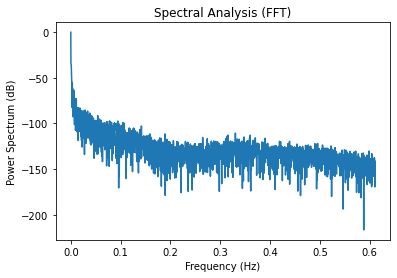

In [7]:
nfft = nextpow2(N) # (optional)Next power of 2 from length of y
sig_freq=np.fft.fft(data, nfft)
PS=np.abs(sig_freq)**2
PS=PS/max(PS)  # normalize PS to its maximum
faxis=np.linspace(0,1,int(nfft/2))*samplerate/2    


plt.figure()
plt.plot(faxis,20*np.log10(PS[:int(nfft/2)]))
# plot(faxis,PS[:nfft/2])
plt.title('Spectral Analysis (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum (dB)')

### Welch method

Sooth the signal in the frequency domin, like the moving 

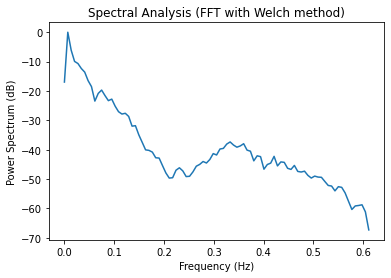

In [8]:
# %% Spectral analysis (FFT with Welch method)
windowlength=int(np.round(N/segmentNo))
window = windows.hamming(windowlength)
fxis_W, PS_W = welch(data,samplerate, window=window)
PS_W=PS_W/max(PS_W)



plt.figure()
plt.plot(fxis_W,20*np.log10(PS_W))  # represented by dB
# plt.plot(faxis_W,PS_W)
plt.title('Spectral Analysis (FFT with Welch method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum (dB)')
# %%

plt.show()